In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
df=pd.read_csv(r"C:\Users\anusa\Downloads\Plasma_Alz.csv")
df.columns
#df.head(30)
df.dtypes
df.columns.tolist()

In [ ]:
#Check for missing values
print(df.isnull().sum())

In [ ]:
#Clear missing values
df=df.dropna(subset=['CSF Amyloid (pg/mL)', 'CSF Total tau (pg/mL)', 'CSF Phosphorylated tau (pg/mL)'])
df['APOE4']=df['APOE4'].dropna()
df = df.rename(columns={"Progression to Alzheimer's Disease":'Progression to Alzheimers'})

#Categorise patients into not affected and currently affected
df.loc[df['Diagnostic']=="Alzheimer's Disease", 'Progression to Alzheimers']='Current'
df.loc[df['Diagnostic']=="Control", 'Progression to Alzheimers']='No'
df=df.dropna(subset=['Progression to Alzheimers'])                        
df.head(5)



In [ ]:
#Save cleaned file
df.to_csv('Biomarkers_Alzheimers',index=False)

## Analysis

#### APOE4 Status of Biomarker Distribution

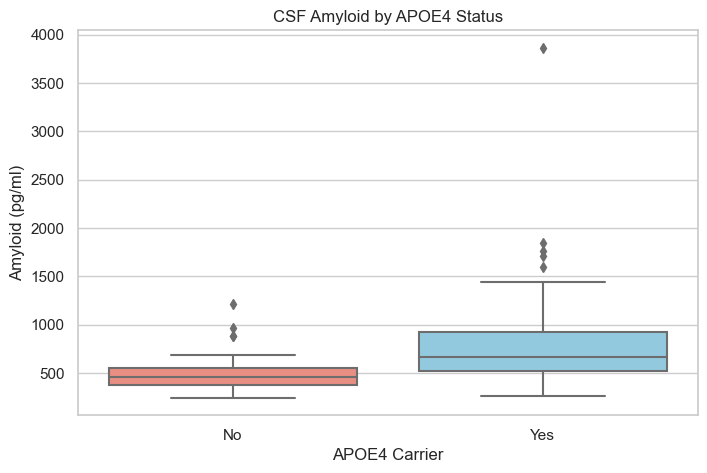

Amyloid: t=nan, p=nan
No significant difference in amyloid levels of APOE4 carriers vs non-carriers


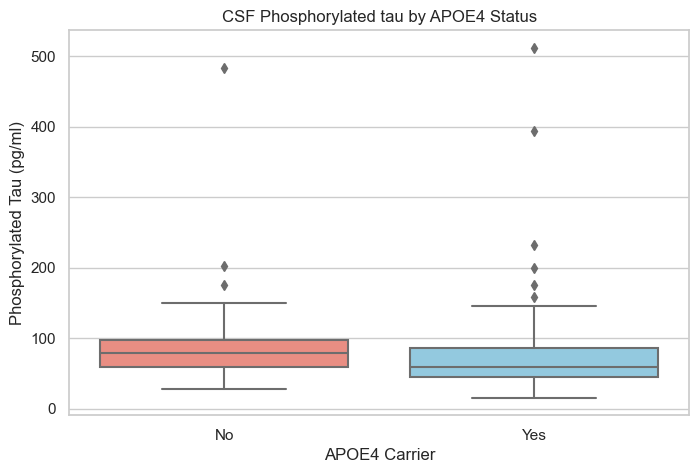

P_tau: t=nan, p=nan
No significant difference in phosphorylated tau levels of APOE4 carriers vs non-carriers


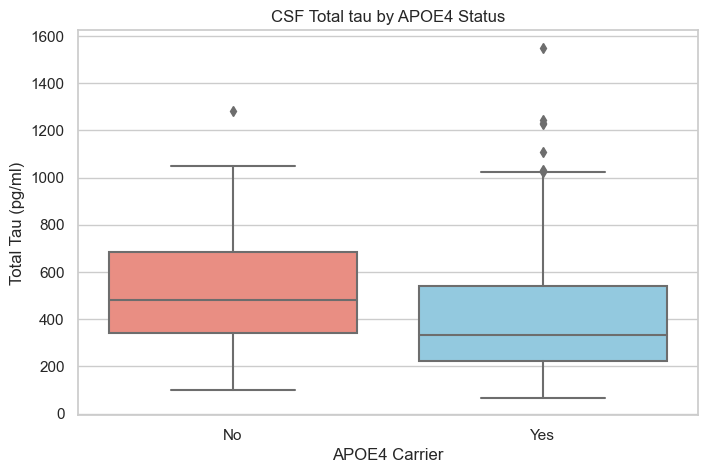

P_tau: t=nan, p=nan
No significant difference in total tau levels of APOE4 carriers vs non-carriers


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Set style
sns.set(style='whitegrid')

#Compare amyloid
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
sns.boxplot(data=df, x='APOE4', y='CSF Amyloid (pg/mL)', 
            palette={'No': "skyblue", 'Yes': "salmon"})
plt.setp(axes, xticklabels=['No', 'Yes'])
plt.title("CSF Amyloid by APOE4 Status")
plt.xlabel("APOE4 Carrier")
plt.ylabel("Amyloid (pg/ml)")
plt.show()

apoE4_yes1 = df[df['APOE4'] == 1]['CSF Amyloid (pg/mL)']
apoE4_no1 = df[df['APOE4'] == 0]['CSF Amyloid (pg/mL)']

t_stat, p_value = ttest_ind(apoE4_yes1.dropna(), apoE4_no1.dropna())
print(f"Amyloid: t={t_stat:.2f}, p={p_value:.4f}")
if p_value<0.05:
    print('Significant difference in amyloid levels between carriers and non-carriers of APOE4')
else:
    print('No significant difference in amyloid levels of APOE4 carriers vs non-carriers')

# Compare Ptau levels
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
sns.boxplot(data=df, x='APOE4', y='CSF Phosphorylated tau (pg/mL)', 
            palette={'No': "skyblue", 'Yes': "salmon"})
plt.setp(axes, xticklabels=['No', 'Yes'])
plt.title("CSF Phosphorylated tau by APOE4 Status")
plt.xlabel("APOE4 Carrier")
plt.ylabel("Phosphorylated Tau (pg/ml)")
plt.show()

apoE4_yes2= df[df['APOE4'] == 1]['CSF Phosphorylated tau (pg/mL)']
apoE4_no2 = df[df['APOE4'] == 0]['CSF Phosphorylated tau (pg/mL)']
t_stat, p_value = ttest_ind(apoE4_yes2.dropna(), apoE4_no2.dropna())
print(f"P_tau: t={t_stat:.2f}, p={p_value:.4f}")
if p_value<0.05:
    print('Significant difference in phosphorylated tau levels between carriers and non-carriers of APOE4')
else:
    print('No significant difference in phosphorylated tau levels of APOE4 carriers vs non-carriers')

# Compare tau levels
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
sns.boxplot(data=df, x='APOE4', y='CSF Total tau (pg/mL)', 
            palette={'No': "skyblue", 'Yes': "salmon"})
plt.setp(axes, xticklabels=['No', 'Yes'])
plt.title("CSF Total tau by APOE4 Status")
plt.xlabel("APOE4 Carrier")
plt.ylabel("Total Tau (pg/ml)")
plt.show()

apoE4_yes3= df[df['APOE4'] == 1]['CSF Total tau (pg/mL)']
apoE4_no3 = df[df['APOE4'] == 0]['CSF Total tau (pg/mL)']
t_stat, p_value = ttest_ind(apoE4_yes3.dropna(), apoE4_no3.dropna())
print(f"P_tau: t={t_stat:.2f}, p={p_value:.4f}")
if p_value<0.05:
    print('Significant difference in total tau levels between carriers and non-carriers of APOE4')
else:
    print('No significant difference in total tau levels of APOE4 carriers vs non-carriers')


#### Correlation 

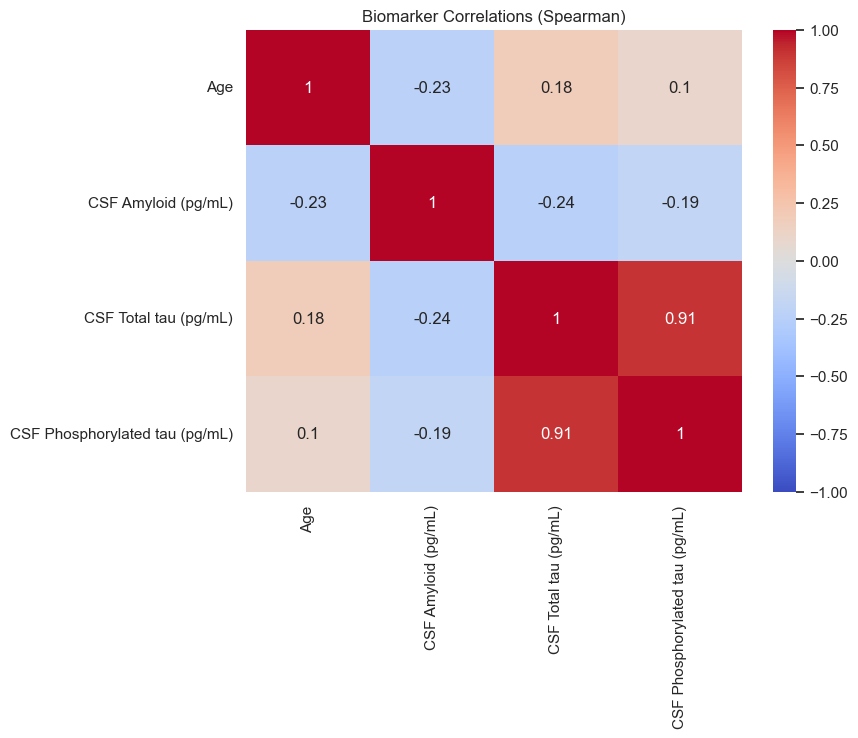

In [ ]:
# Select numeric columns
corr_cols = ['Age', 'CSF Amyloid (pg/mL)', 'CSF Total tau (pg/mL)', 'CSF Phosphorylated tau (pg/mL)']
corr_matrix = df[corr_cols].corr(method='spearman')

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Biomarker Correlations (Spearman)")
plt.show()

In [ ]:
### Age groups vs Tau

Tau by Age: F=nan, p=nan
No significant difference in total tau levels between age groups


c:\Users\anusa\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


<Axes: xlabel='Age groups', ylabel='CSF Total tau (pg/mL)'>

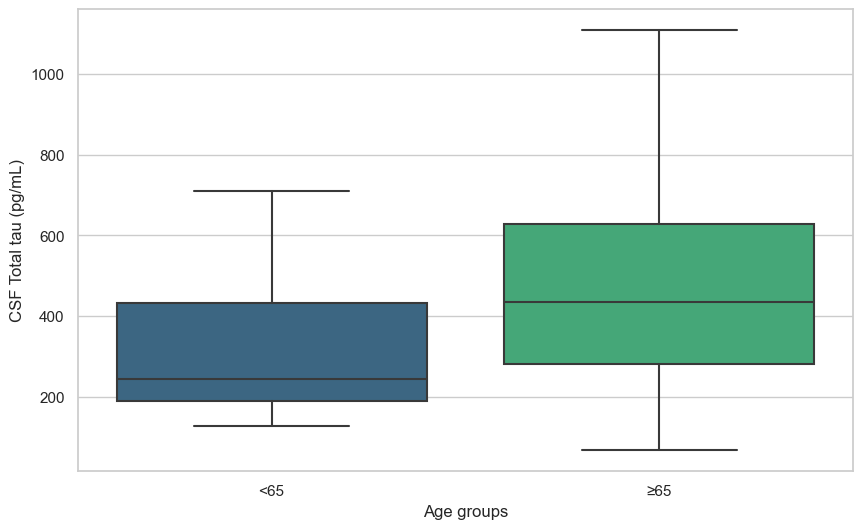

In [ ]:

df['Age groups'] = pd.cut(df['Age'], bins=[0, 65, 100], labels=["<65", "≥65"])

# ANOVA for tau across age groups
from scipy.stats import f_oneway
young = df[df['Age groups'] == "<50"]['CSF Total tau (pg/mL)'].dropna()
old = df[df['Age groups'] == "≥50"]['CSF Total tau (pg/mL)'].dropna()
f_stat, p_value = f_oneway(young, old)
print(f"Tau by Age: F={f_stat:.2f}, p={p_value:.4f}")
if p_value<0.05:
    print('Significant difference in total tau levels between age groups')
else:
    print('No significant difference in total tau levels between age groups')


# 3. Generate boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df.dropna(subset=['CSF Total tau (pg/mL)', 'Age']),
    x='Age groups',
    y='CSF Total tau (pg/mL)',
    palette='viridis',
    showfliers=False  # Hide outliers for cleaner visualization
)

## Biomarker levels across groups

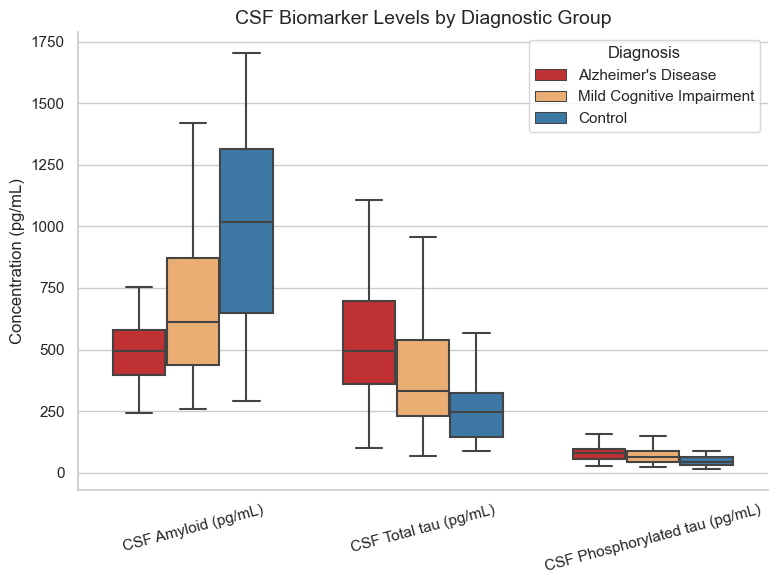


--- Amyloid ---
ANOVA: F = 26.53, p = 0.0000
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
       group1                 group2           meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------------
Alzheimer's Disease                   Control  603.4154    0.0  404.9508    801.88   True
Alzheimer's Disease Mild Cognitive Impairment  168.4991 0.0034   47.6415  289.3567   True
            Control Mild Cognitive Impairment -434.9163    0.0 -634.4177 -235.4149   True
-----------------------------------------------------------------------------------------

--- Total tau ---
ANOVA: F = 10.93, p = 0.0000
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
       group1                 group2           meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------------
Alzhei

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 2. Melt data for visualization
df_melted = df.melt(
    id_vars=['Diagnostic'],
    value_vars=['CSF Amyloid (pg/mL)', 'CSF Total tau (pg/mL)', 'CSF Phosphorylated tau (pg/mL)'],
    var_name='Biomarker',
    value_name='Level'
)

# 3. Create boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_melted,
    x='Biomarker',
    y='Level',
    hue='Diagnostic',
    palette={
        'Control': '#2c7bb6',       # Blue
        'Mild Cognitive Impairment': '#fdae61',  # Orange
        "Alzheimer's Disease": '#d7191c'   # Red
    },
    showfliers=False,
    width=0.7
)

# Add plot labels
plt.title('CSF Biomarker Levels by Diagnostic Group', fontsize=14)
plt.xlabel('')
plt.ylabel('Concentration (pg/mL)', fontsize=12)
plt.xticks(rotation=15)
sns.despine()
plt.legend(title='Diagnosis', loc='upper right')
plt.tight_layout()
plt.show()

# 4. ANOVA and Tukey HSD for each biomarker
biomarkers = {
    'Amyloid': 'CSF Amyloid (pg/mL)',
    'Total tau': 'CSF Total tau (pg/mL)',
    'Phosphorylated tau': 'CSF Phosphorylated tau (pg/mL)'
}

for name, col in biomarkers.items():
    print(f"\n--- {name} ---")
    
    # Extract groups
    groups = {}
    for diag in ["Control", "Mild Cognitive Impairment", "Alzheimer's Disease"]:
        groups[diag] = df[df['Diagnostic'] == diag][col].dropna()
    
    # One-way ANOVA
    f_val, p_val = f_oneway(*groups.values())
    print(f"ANOVA: F = {f_val:.2f}, p = {p_val:.4f}")
    
    # Tukey HSD if ANOVA is significant
    if p_val < 0.05:
        tukey = pairwise_tukeyhsd(
            endog=df[col].dropna(),
            groups=df['Diagnostic'].dropna(),
            alpha=0.05
        )
        print(tukey)
    else:
        print("No significant differences (ANOVA p > 0.05)")

In [ ]:
from scipy.stats import sem, t

# Calculate mean and 95% CI
def mean_with_ci(x):
    mean_val = np.mean(x)
    ci = t.ppf(0.975, len(x)-1) * sem(x)  # 95% CI
    return f"{mean_val:.1f} ({mean_val-ci:.1f}–{mean_val+ci:.1f})"

# Group statistics
results = df.groupby('Diagnostic')['CSF Amyloid (pg/mL)'].agg([
    ('Mean', 'mean'),
    ('95% CI', lambda x: mean_with_ci(x)),
    ('N', 'count')
]).round(1)

# Print formatted table
print("Amyloid-β Levels by Diagnostic Group [Mean (95% CI)]")
print("--------------------------------------------------")
print(results[['Mean', '95% CI', 'N']].to_markdown())

results = df.groupby('Diagnostic')['CSF Total tau (pg/mL)'].agg([
    ('Mean', 'mean'),
    ('95% CI', lambda x: mean_with_ci(x)),
    ('N', 'count')
]).round(1)

# Print formatted table
print("\nTau Levels by Diagnostic Group [Mean (95% CI)]")
print("--------------------------------------------------")
print(results[['Mean', '95% CI', 'N']].to_markdown())

results = df.groupby('Diagnostic')['CSF Phosphorylated tau (pg/mL)'].agg([
    ('Mean', 'mean'),
    ('95% CI', lambda x: mean_with_ci(x)),
    ('N', 'count')
]).round(1)

# Print formatted table
print("\nPhosphprylated tau Levels by Diagnostic Group [Mean (95% CI)]")
print("--------------------------------------------------")
print(results[['Mean', '95% CI', 'N']].to_markdown())

Amyloid-β Levels by Diagnostic Group [Mean (95% CI)]
--------------------------------------------------
| Diagnostic                |   Mean | 95% CI                |   N |
|:--------------------------|-------:|:----------------------|----:|
| Alzheimer's Disease       |  508.4 | 508.4 (466.4–550.4)   |  91 |
| Control                   | 1111.8 | 1111.8 (761.6–1462.0) |  20 |
| Mild Cognitive Impairment |  676.9 | 676.9 (610.5–743.3)   |  86 |

Tau Levels by Diagnostic Group [Mean (95% CI)]
--------------------------------------------------
| Diagnostic                |   Mean | 95% CI              |   N |
|:--------------------------|-------:|:--------------------|----:|
| Alzheimer's Disease       |  551.1 | 551.1 (494.3–607.9) |  91 |
| Control                   |  291.4 | 291.4 (190.0–392.7) |  20 |
| Mild Cognitive Impairment |  416.2 | 416.2 (361.3–471.1) |  86 |

Phosphprylated tau Levels by Diagnostic Group [Mean (95% CI)]
--------------------------------------------------
| D

In [ ]:
df.head(10)

,Sample,Diagnostic,Sex,Age,MMSE,CSF Amyloid (pg/mL),CSF Total tau (pg/mL),CSF Phosphorylated tau (pg/mL),APOE4,Progression to Alzheimers,Progression time (months),Age groups
0,1,Alzheimer's Disease,Female,68,26,688.0,369.0,107.0,Yes,Current,NaN,≥65
1,2,Alzheimer's Disease,Female,66,22,489.0,482.0,176.0,Yes,Current,NaN,≥65
2,3,Alzheimer's Disease,Female,72,23,509.0,329.0,114.0,Yes,Current,NaN,≥65
3,4,Alzheimer's Disease,Male,73,25,544.0,482.0,80.0,No,Current,NaN,≥65
4,5,Alzheimer's Disease,Female,75,15,303.0,806.0,120.0,No,Current,NaN,≥65
5,6,Alzheimer's Disease,Female,83,27,520.0,501.0,67.0,No,Current,NaN,≥65
6,7,Alzheimer's Disease,Male,76,22,243.0,686.0,94.0,Yes,Current,NaN,≥65
7,9,Alzheimer's Disease,Female,80,25,571.0,620.0,96.0,No,Current,NaN,≥65
8,10,Alzheimer's Disease,Female,85,24,564.0,1109.0,128.0,No,Current,NaN,≥65
9,12,Alzheimer's Disease,Female,79,25,520.0,559.0,81.0,No,Current,NaN,≥65


### APOE4 as risk factor

#### Carriers at higher risk of AD

In [ ]:

df['disease_status'] = np.where(df['Progression to Alzheimers'].isin(['Yes', 'Current']), 'yes', 'no')
from statsmodels.stats.proportion import proportions_ztest
df.head(5)

# Generate contingency table
contingency_table = pd.crosstab(df['APOE4'], df['disease_status'])

# Extract counts
n_yes_carriers = contingency_table.loc['Yes', 'yes']  # Carriers (apoe4=1) with disease
n_yes_noncarriers = contingency_table.loc['No', 'yes']  # Non-carriers (apoe4=0) with disease
n_carriers = contingency_table.loc['Yes'].sum()  # Total carriers
n_noncarriers = contingency_table.loc['No'].sum()  # Total non-carriers

# Perform one-sided z-test (alternative='larger' checks p1 > p0)
counts = np.array([n_yes_carriers, n_yes_noncarriers])
nobs = np.array([n_carriers, n_noncarriers])

z_stat, p_value = proportions_ztest(counts, nobs, alternative='larger')

# Print results
print("--- One-Sided Z-Test for Proportions ---")
print(f"Proportion of diseased in carrier group: {n_yes_carriers / n_carriers:.4f}")
print(f"Proportion of diseased in non-carrier group: {n_yes_noncarriers / n_noncarriers:.4f}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject H₀. APOE4 carriers are at a higher risk of AD")
else:
    print("\nConclusion: Fail to reject H₀. No evidence that carriers have higher disease risk.")

--- One-Sided Z-Test for Proportions ---
Proportion of diseased in carrier group: 0.8851
Proportion of diseased in non-carrier group: 0.5413
Z-statistic: 5.1883
P-value: 0.0000

Conclusion: Reject H₀. APOE4 carriers are at a higher risk of AD


#### Comparing biomarker levels and APOE4 status across groups

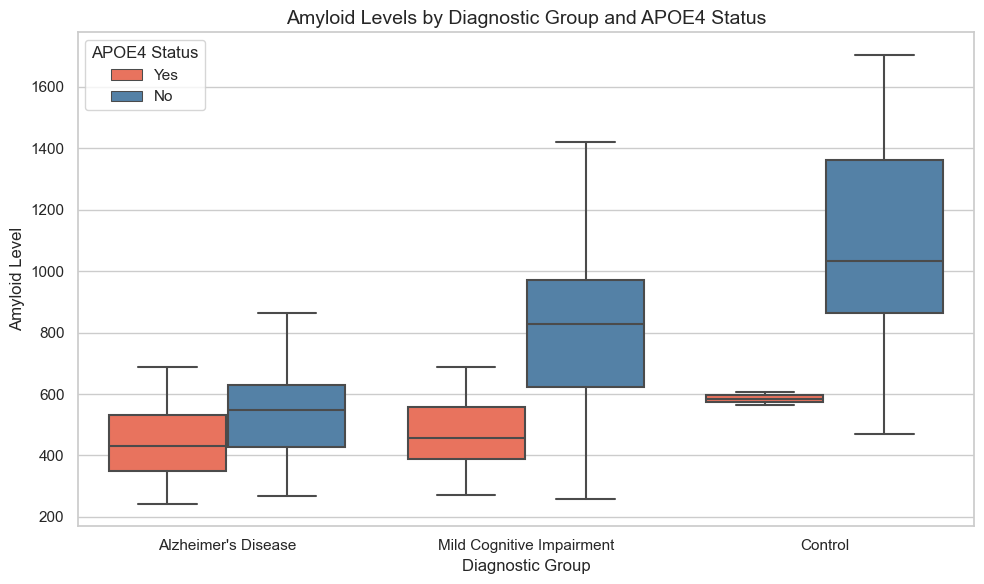

P-Value: 0.017474934070433715
Amyloid levels differ with APOE4 status in Alzheimer's Disease group
P-Value: 1.5928013750918314e-07
Amyloid levels differ with APOE4 status in Mild Cognitive Impairment group
P-Value: 0.2623936332367475
Amyloid levels dont differ with APOE4 Status in Control group


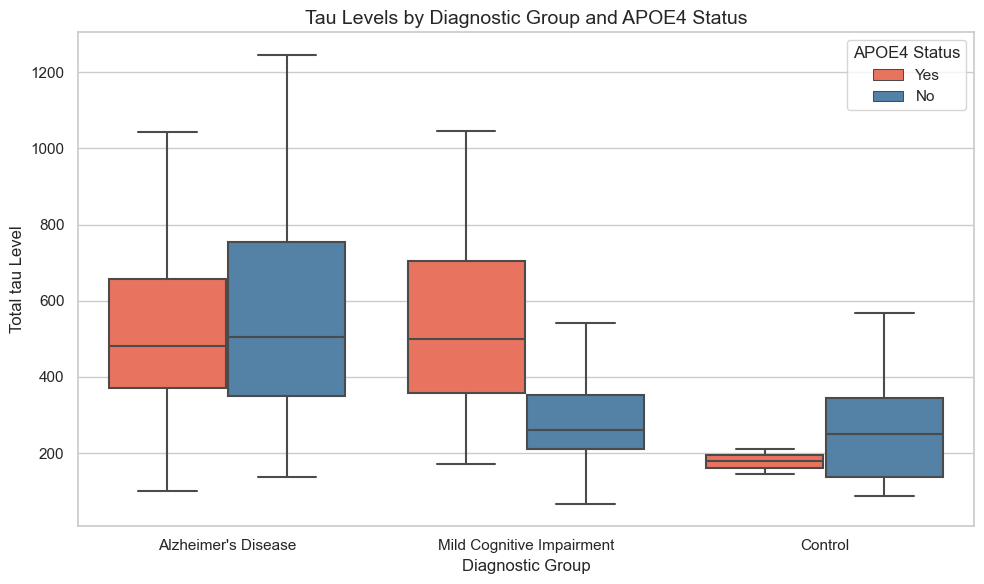

P-Value: 0.19072315916161653
Tau levels dont differ with APOE4 Status in Alzheimer's Disease group
P-Value: 4.701460261489188e-05
Tau levels differ with APOE4 status in Mild Cognitive Impairment group
P-Value: 0.46317366145902084
Tau levels dont differ with APOE4 Status in Control group


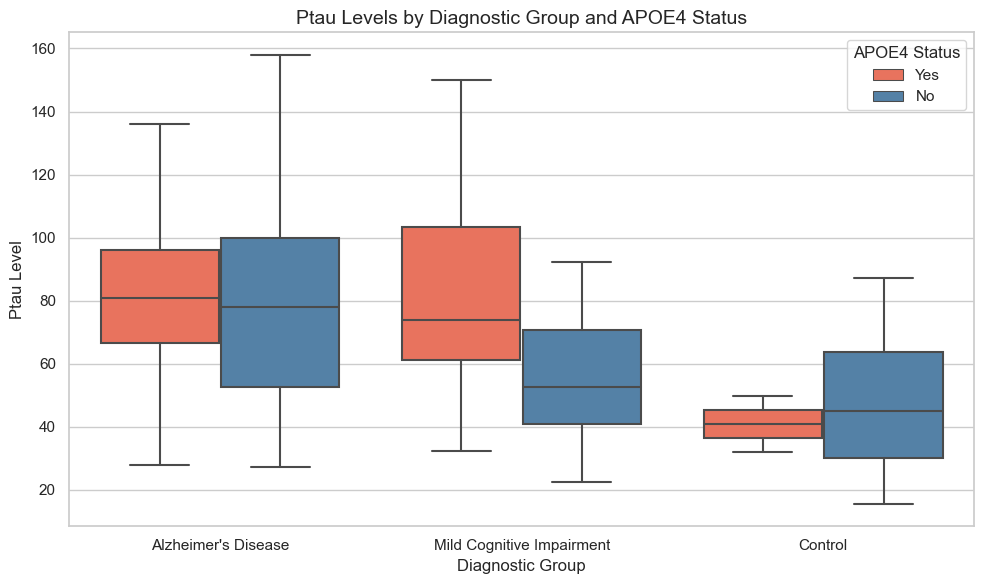

P-Value: 0.36824038790611535
Ptau levels dont differ with APOE4 Status in Alzheimer's Disease group
P-Value: 0.7030640622124902
Ptau levels dont differ with APOE4 Status in Mild Cognitive Impairment group
P-Value: 0.6257050354797535
Ptau levels dont differ with APOE4 Status in Control group


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Diagnostic',          # Diagnostic groups on x-axis
    y='CSF Amyloid (pg/mL)',            # Amyloid levels on y-axis
    hue='APOE4',     # Color by APOE4 status
    data=df,
    palette={'Yes': 'tomato', 'No': 'steelblue'},  # Custom colors
    showfliers=False        # Hide outliers for cleaner plot (optional)
)
# Add titles and labels
plt.title('Amyloid Levels by Diagnostic Group and APOE4 Status', fontsize=14)
plt.xlabel('Diagnostic Group', fontsize=12)
plt.ylabel('Amyloid Level', fontsize=12)
plt.legend(title='APOE4 Status')
plt.tight_layout()
plt.show()
#Find stats
from scipy import stats
for group in df['Diagnostic'].unique():
    carrier = df[(df['Diagnostic'] == group) & (df['APOE4'] == 'Yes')]['CSF Amyloid (pg/mL)'] 
    noncarrier = df[(df['Diagnostic'] == group) & (df['APOE4'] == 'No')]['CSF Amyloid (pg/mL)'] 
    t_val, p_val = stats.ttest_ind(carrier,noncarrier)
    n = len(carrier)+len(noncarrier)-2
    #crit_t = stats.t.ppf(1 - alpha/2, df)
    print("P-Value:", p_val)
    #print("Critical t-value:", crit_t)
    if p_val<=0.05:
        print(f"Amyloid levels differ with APOE4 status in {group} group")
    else:
        print(f'Amyloid levels dont differ with APOE4 Status in {group} group')

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Diagnostic',          # Diagnostic groups on x-axis
    y='CSF Total tau (pg/mL)',            # Amyloid levels on y-axis
    hue='APOE4',     # Color by APOE4 status
    data=df,
    palette={'Yes': 'tomato', 'No': 'steelblue'},  # Custom colors
    showfliers=False        # Hide outliers for cleaner plot (optional)
)
# Add titles and labels
plt.title('Tau Levels by Diagnostic Group and APOE4 Status', fontsize=14)
plt.xlabel('Diagnostic Group', fontsize=12)
plt.ylabel('Total tau Level', fontsize=12)
plt.legend(title='APOE4 Status')
plt.tight_layout()
plt.show()
#Find stats
from scipy import stats
for group in df['Diagnostic'].unique():
    carrier = df[(df['Diagnostic'] == group) & (df['APOE4'] == 'Yes')]['CSF Total tau (pg/mL)'] 
    noncarrier = df[(df['Diagnostic'] == group) & (df['APOE4'] == 'No')]['CSF Total tau (pg/mL)'] 
    t_val, p_val = stats.ttest_ind(carrier,noncarrier)
    n = len(carrier)+len(noncarrier)-2
    #crit_t = stats.t.ppf(1 - alpha/2, df)
    print("P-Value:", p_val)
    #print("Critical t-value:", crit_t)
    if p_val<=0.05:
        print(f"Tau levels differ with APOE4 status in {group} group")
    else:
        print(f'Tau levels dont differ with APOE4 Status in {group} group')

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Diagnostic',          # Diagnostic groups on x-axis
    y='CSF Phosphorylated tau (pg/mL)',            # Amyloid levels on y-axis
    hue='APOE4',     # Color by APOE4 status
    data=df,
    palette={'Yes': 'tomato', 'No': 'steelblue'},  # Custom colors
    showfliers=False        # Hide outliers for cleaner plot (optional)
)
# Add titles and labels
plt.title('Ptau Levels by Diagnostic Group and APOE4 Status', fontsize=14)
plt.xlabel('Diagnostic Group', fontsize=12)
plt.ylabel('Ptau Level', fontsize=12)
plt.legend(title='APOE4 Status')
plt.tight_layout()
plt.show()
#Find stats
from scipy import stats
for group in df['Diagnostic'].unique():
    carrier = df[(df['Diagnostic'] == group) & (df['APOE4'] == 'Yes')]['CSF Phosphorylated tau (pg/mL)'] 
    noncarrier = df[(df['Diagnostic'] == group) & (df['APOE4'] == 'No')]['CSF Phosphorylated tau (pg/mL)'] 
    t_val, p_val = stats.ttest_ind(carrier,noncarrier)
    n = len(carrier)+len(noncarrier)-2
    #crit_t = stats.t.ppf(1 - alpha/2, df)
    print("P-Value:", p_val)
    #print("Critical t-value:", crit_t)
    if p_val<=0.05:
        print(f"Ptau levels differ with APOE4 status in {group} group")
    else:
        print(f'Ptau levels dont differ with APOE4 Status in {group} group')

#### APOE4 effect on biomarker levels with age

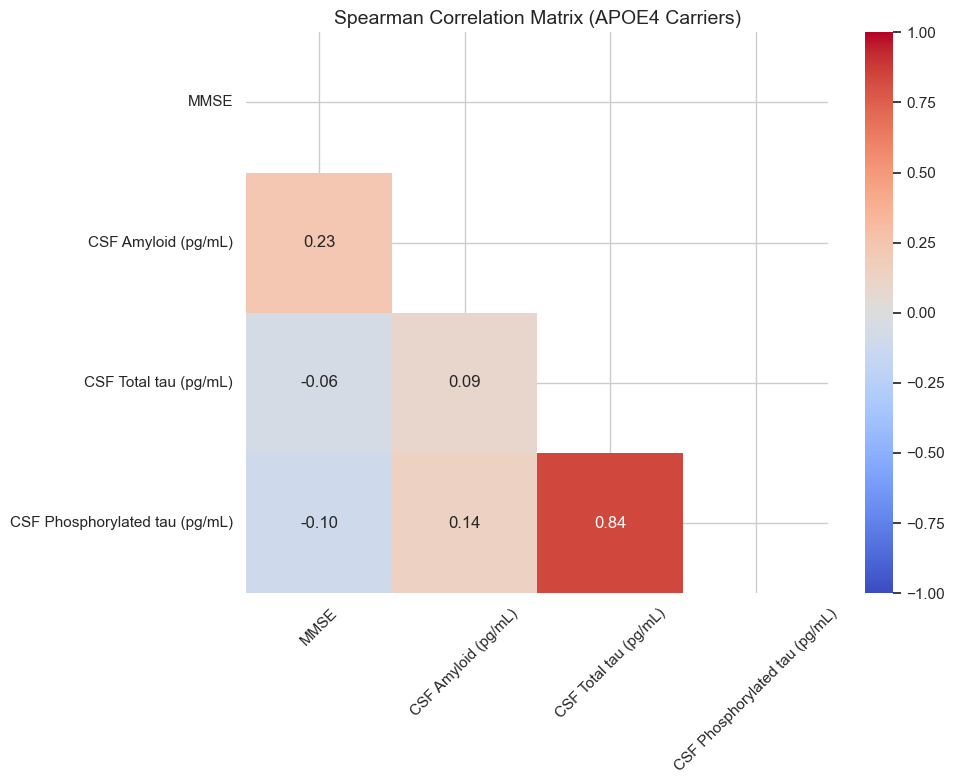

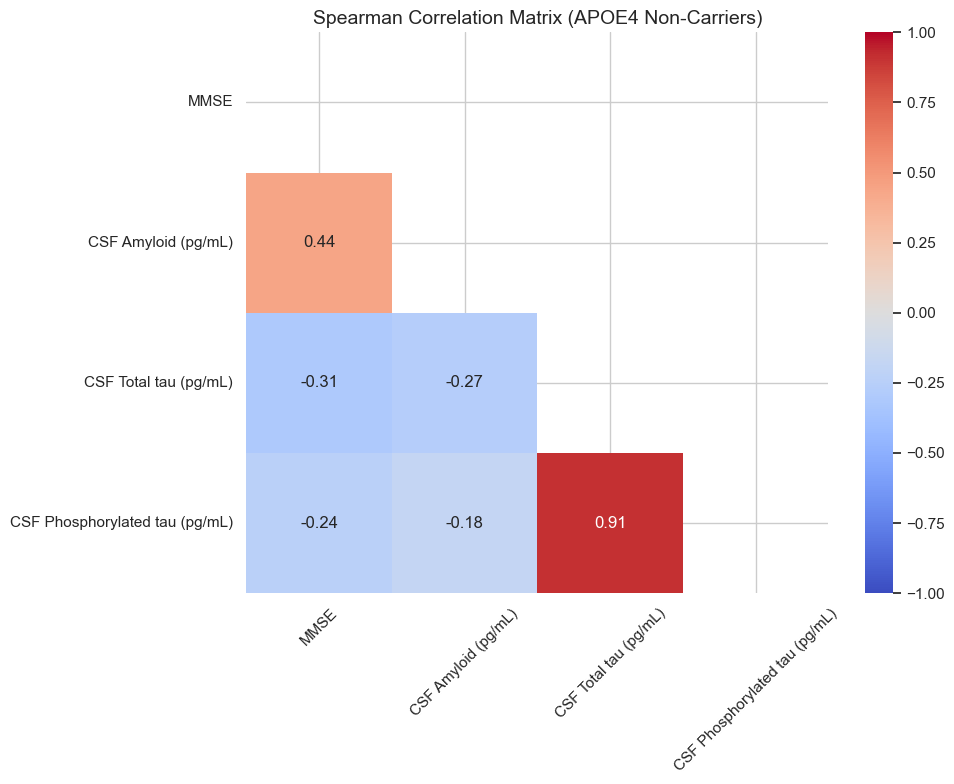

In [ ]:

# Filter for APOE4 carriers only
group = df[df['APOE4'] == 'Yes']

parameters = ['MMSE', 'CSF Amyloid (pg/mL)', 'CSF Total tau (pg/mL)', 
              'CSF Phosphorylated tau (pg/mL)']

# Calculate Spearman correlation matrix
corr_matrix = group[parameters].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,      # Show correlation values
    fmt=".2f",      # Format to 2 decimal places
    cmap='coolwarm', # Red (positive) to Blue (negative) colormap
    vmin=-1,        # Fix color scale from -1 to 1
    vmax=1,
    mask=np.triu(np.ones_like(corr_matrix))
)

plt.title('Spearman Correlation Matrix (APOE4 Carriers)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Filter for non carriers
group = df[(df['APOE4'] == 'No')]

parameters = ['MMSE', 'CSF Amyloid (pg/mL)', 'CSF Total tau (pg/mL)', 
              'CSF Phosphorylated tau (pg/mL)']

# Calculate Spearman correlation matrix
corr_matrix = group[parameters].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,      # Show correlation values
    fmt=".2f",      # Format to 2 decimal places
    cmap='coolwarm', # Red (positive) to Blue (negative) colormap
    vmin=-1,        # Fix color scale from -1 to 1
    vmax=1,
    mask=np.triu(np.ones_like(corr_matrix))
)

plt.title('Spearman Correlation Matrix (APOE4 Non-Carriers)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()